# Chapter 3

## Qualitative predictors

Here we use `ISLR`s `Carseats` data to predict child car seat sales in 400 locations

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import statsmodels.stats.anova
# from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
carseats = sm.datasets.get_rdataset("Carseats", "ISLR").data

In [7]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


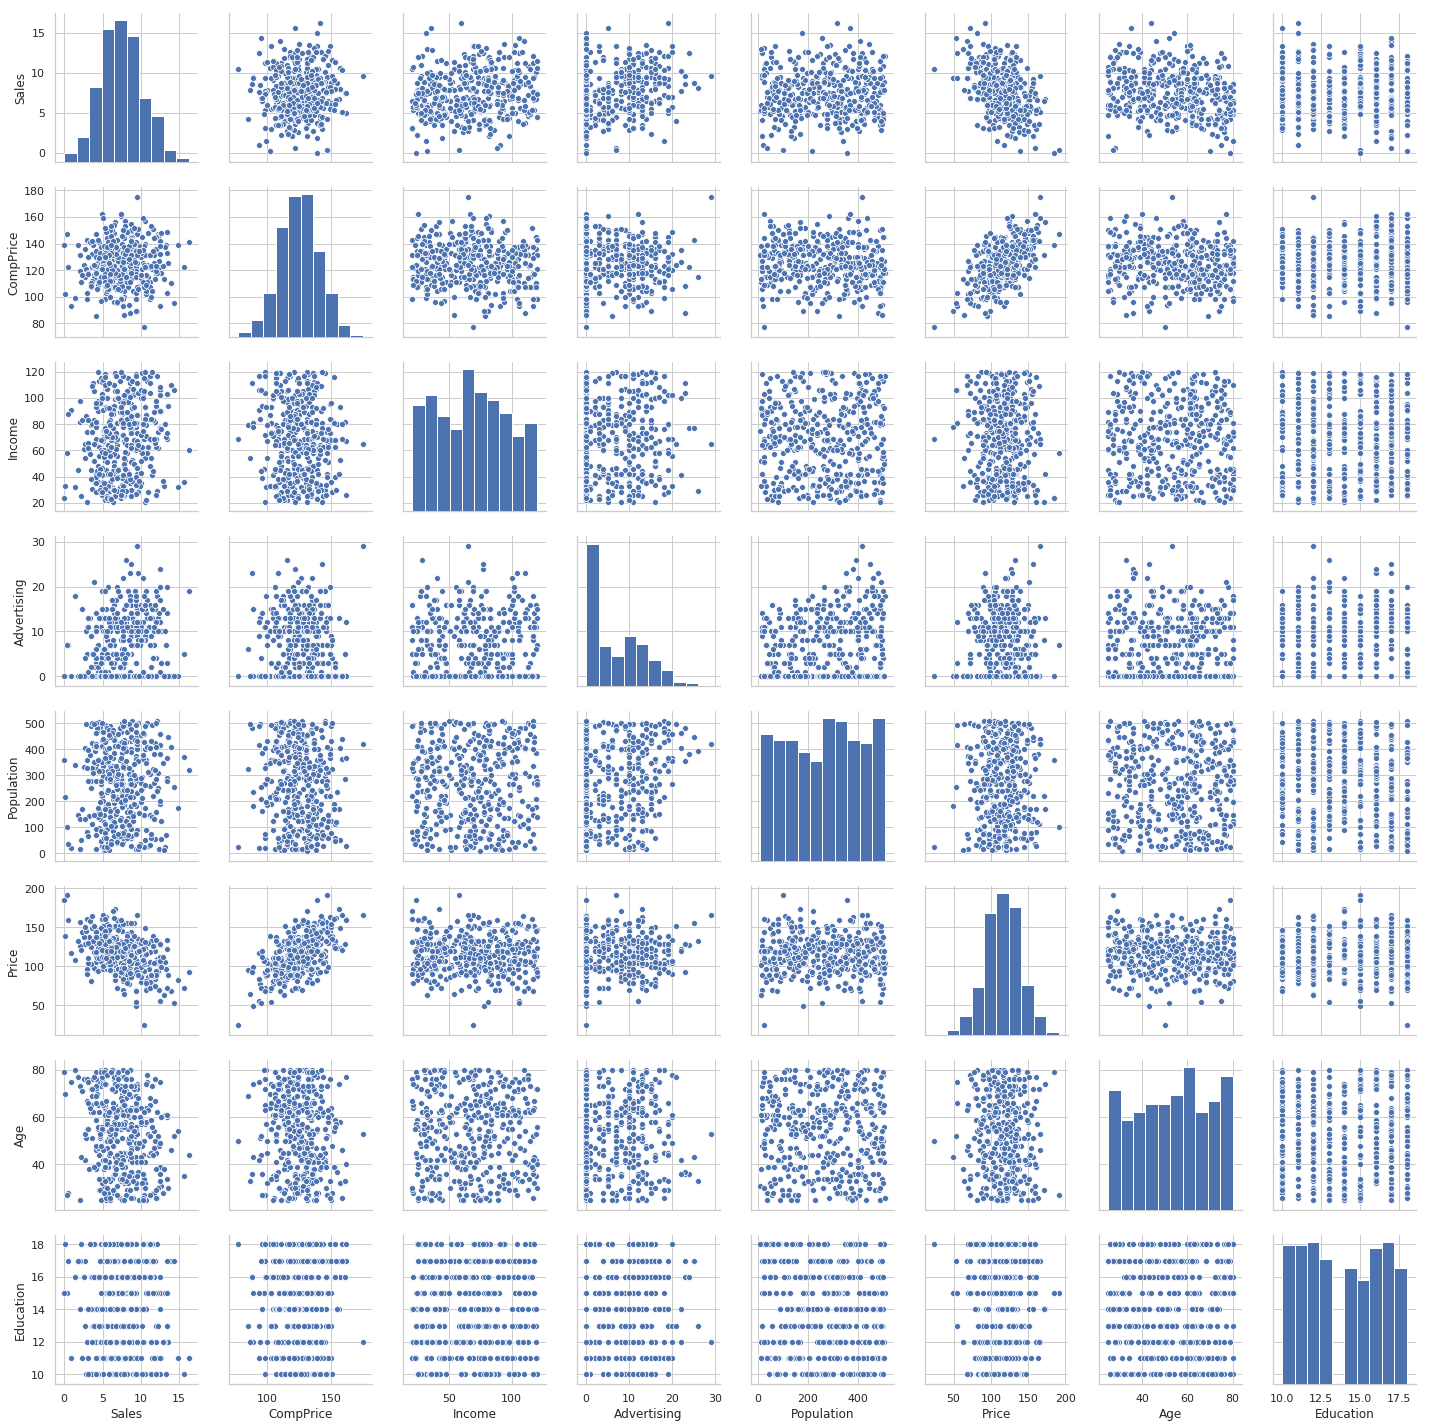

In [9]:
sns.pairplot(carseats)

In [12]:
# Looks like "Price" might be good, everything else seems fuzzier
# We have some qualitative data in here!
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [22]:
# statsmodels doesn't assume there'll be an intercept, so you have to add one
X_train =  sm.add_constant(carseats)

# statsmodels doesn't have the "." syntax for all columns
# Note that statsmodels (following R) automatically encodes the categorical variables with dummy variables 
# (Using patsy, I think)
fitting_columns = "+".join(x for x in carseats.columns if x != "Sales")
model = smf.ols(f"Sales ~{fitting_columns}+Income:Advertising+Price:Age", data=carseats)
results = model.fit()
print(results.summary())
# p-value for F-statistic and p-value for lstat^2 term both tiny, suggesting this is a valid inclusion


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 13 May 2019   Prob (F-statistic):          6.14e-166
Time:                        21:22:39   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756    

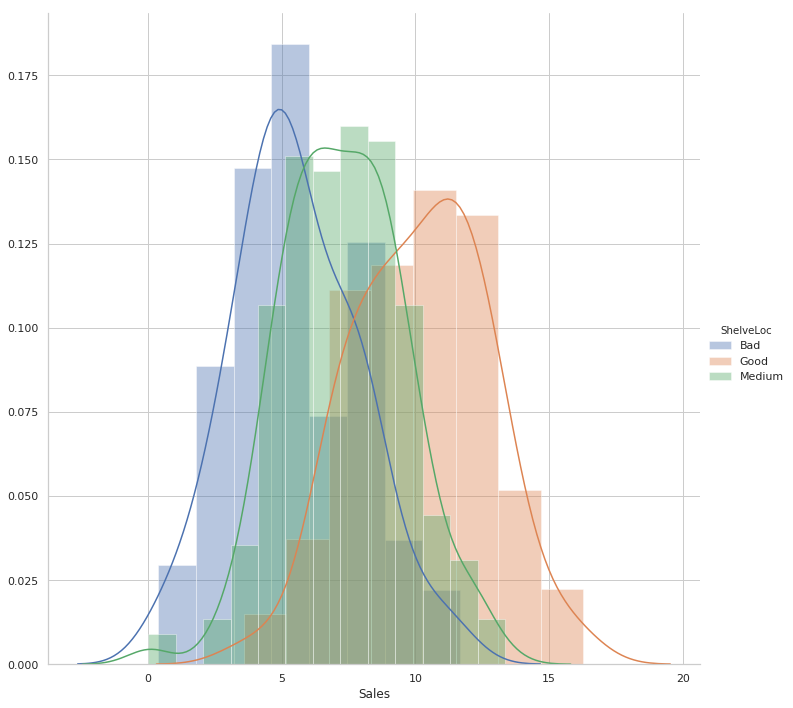

In [40]:
# The p-value for ShelveLoc suggests it is predictive - plot with FacetGrid
# fig, ax = plt.subplots(figsize=(10,10))
g = sns.FacetGrid(carseats, hue="ShelveLoc", height=10)
g = g.map(sns.distplot, "Sales").add_legend()
